# **Preprocessing Job Experience Data for Predictive Modeling**

# A.

In [1]:
import pandas as pd

exp_data= pd.read_csv('exp.csv', encoding='utf-8')
exp_data.head()    # or exp_data.tail()

,Unnamed: 0,id,title,time_type_full_or_part,duration_of_cooperation,location_hybrid,company_url,company_name
0,0,1,Search Engine Optimization Specialist,Pixune · Freelance,Jul 2022 - Present · 2 yrs 1 mo,Poland · Remote,https://www.linkedin.com/search/results/all/?k...,NaN
1,1,2,Search Engine Optimization Manager,Cofinfo · Self-employed,Dec 2022 - Present · 1 yr 8 mos,NaN,https://www.linkedin.com/search/results/all/?k...,NaN
2,2,3,Search Engine Optimization Specialist,Karnakon · Full-time,Dec 2020 - Aug 2022 · 1 yr 9 mos,"Tehran, Iran",https://www.linkedin.com/search/results/all/?k...,NaN
3,3,4,Trader,Forex Trading Online · Apprenticeship,Apr 2020 - Present · 4 yrs 4 mos,NaN,https://www.linkedin.com/company/18372839/,Forex Trading Online
4,4,5,In personal marketing,Home Design Decoration ideas · Part-time,Jan 2018 - Present · 6 yrs 7 mos,"Shiraz County, Fars, Iran",https://www.linkedin.com/company/13660967/,Home Design Decoration ideas


# B.

In [2]:
# Check for missing values
missing_values = exp_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Unnamed: 0                    0
id                            0
title                         5
time_type_full_or_part       19
duration_of_cooperation     861
location_hybrid            3221
company_url                  41
company_name               3282
dtype: int64


In [3]:
import re

def extract_duration_in_months(y):
    if isinstance(y, str):
        result = re.search(r'(\d+)\s+yrs?\s*(\d*)\s*mos?', y)
        if result:
            years = int(result.group(1)) if result.group(1) else 0
            months = int(result.group(2)) if result.group(2) else 0
            return years * 12 + months
       
        result = re.search(r'(\d+)\s+yrs?', y)
        if result:
            years = int(result.group(1))
            return years * 12
 
        result = re.search(r'(\d+)\s+mos?', y)
        if result:
            months = int(result.group(1))
            return months
    return None

exp_data['cooperation_duration_months'] = exp_data['duration_of_cooperation'].apply(lambda x: extract_duration_in_months(str(x)))
exp_data[['duration_of_cooperation', 'cooperation_duration_months']].head()  # or tail


,duration_of_cooperation,cooperation_duration_months
0,Jul 2022 - Present · 2 yrs 1 mo,25.0
1,Dec 2022 - Present · 1 yr 8 mos,20.0
2,Dec 2020 - Aug 2022 · 1 yr 9 mos,21.0
3,Apr 2020 - Present · 4 yrs 4 mos,52.0
4,Jan 2018 - Present · 6 yrs 7 mos,79.0


In [4]:
# Handle missing values in 'duration_of_cooperation'
mean_duration = exp_data['cooperation_duration_months'].mean() 
exp_data['cooperation_duration_months'].fillna(mean_duration, inplace=True)

exp_data['cooperation_duration_months'] = exp_data['cooperation_duration_months'].round().astype(int)

# Convert the values back to years and months format 
def months_to_years_months(months):
    years = months // 12
    months = months % 12
    return f"{years} yrs {months} mos"

exp_data['duration_of_cooperation'] = exp_data['cooperation_duration_months'].apply(months_to_years_months)
exp_data[['duration_of_cooperation', 'cooperation_duration_months']].iloc[10:15]  

C:\Users\user\AppData\Local\Temp\ipykernel_2408\2871807483.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  exp_data['cooperation_duration_months'].fillna(mean_duration, inplace=True)


,duration_of_cooperation,cooperation_duration_months
10,1 yrs 0 mos,12
11,2 yrs 7 mos,31
12,1 yrs 6 mos,18
13,2 yrs 1 mos,25
14,1 yrs 8 mos,20


In [5]:
# Drop rows with missing values
exp_data= exp_data.dropna(subset=['title'])
exp_data= exp_data.dropna(subset=['time_type_full_or_part'])
exp_data= exp_data.dropna(subset=['company_url'])

# Replace missing values with mode
mode_location = exp_data['location_hybrid'].mode()[0]
exp_data['location_hybrid'].fillna(mode_location, inplace=True)
mode_company = exp_data['company_name'].mode()[0]
exp_data['company_name'].fillna(mode_company, inplace=True)

missing_data_after = exp_data.isnull().sum()
print("\nMissing values after handling:")
print(missing_data_after)


Missing values after handling:
Unnamed: 0                     0
id                             0
title                          0
time_type_full_or_part         0
duration_of_cooperation        0
location_hybrid                0
company_url                    0
company_name                   0
cooperation_duration_months    0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_2408\3100134481.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  exp_data['location_hybrid'].fillna(mode_location, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2408\3100134481.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

# C.

In [6]:
import re

def extract_duration_in_months(y):
    if isinstance(y, str):
        result = re.search(r'(\d+)\s+yrs?\s*(\d*)\s*mos?', y)
        if result:
            years = int(result.group(1)) if result.group(1) else 0
            months = int(result.group(2)) if result.group(2) else 0
            return years * 12 + months
       
        result = re.search(r'(\d+)\s+yrs?', y)
        if result:
            years = int(result.group(1))
            return years * 12
 
        result = re.search(r'(\d+)\s+mos?', y)
        if result:
            months = int(result.group(1))
            return months
    return None

exp_data['cooperation_duration_months'] = exp_data['duration_of_cooperation'].apply(lambda x: extract_duration_in_months(str(x)))
exp_data[['duration_of_cooperation', 'cooperation_duration_months']].head()  # or tail


,duration_of_cooperation,cooperation_duration_months
0,2 yrs 1 mos,25
1,1 yrs 8 mos,20
2,1 yrs 9 mos,21
3,4 yrs 4 mos,52
4,6 yrs 7 mos,79


# D.

In [7]:
# List of key roles
key_roles = ['manager' ,'analyst' ,'engineer' ,'developer' ,'consultant', 'sales', 'specialist']
def remove_punctuation(x):
    cleaned_x = ''.join(char for char in x if char.isalnum() or char.isspace())
    return cleaned_x

def process_row(title, company_name):
    title_cleaned = remove_punctuation(title.lower()).strip()
    company_name_cleaned = remove_punctuation(company_name.lower()).strip()

    key_role = 'other'
    for i in key_roles:
        if i in title_cleaned:
            key_role = i
            break
    return title_cleaned, company_name_cleaned, key_role

exp_data[['title_cleaned', 'company_name_cleaned', 'key_role']] = exp_data.apply(
    lambda row: process_row(str(row['title']), str(row['company_name'])), axis=1, result_type='expand') 
exp_data[['title', 'title_cleaned', 'company_name', 'company_name_cleaned', 'key_role']].head()  # or tail


,title,title_cleaned,company_name,company_name_cleaned,key_role
0,Search Engine Optimization Specialist,search engine optimization specialist,TAPSI,tapsi,specialist
1,Search Engine Optimization Manager,search engine optimization manager,TAPSI,tapsi,manager
2,Search Engine Optimization Specialist,search engine optimization specialist,TAPSI,tapsi,specialist
3,Trader,trader,Forex Trading Online,forex trading online,other
4,In personal marketing,in personal marketing,Home Design Decoration ideas,home design decoration ideas,other


# E.

In [8]:
location_encoded = pd.get_dummies(exp_data, columns=['location_hybrid'], prefix='location')
location_encoded = location_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

location_encoded.head()  # or tail

C:\Users\user\AppData\Local\Temp\ipykernel_2408\3466647422.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  location_encoded = location_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,Unnamed: 0,id,title,time_type_full_or_part,duration_of_cooperation,company_url,company_name,cooperation_duration_months,title_cleaned,company_name_cleaned,...,location_ایران,location_برج اوران,location_تهران,location_تهران · On-site,location_تهران مجتمع شهید حدادی,location_مركز رشد دانشگاه تربيت مدرس,location_پارك فناوري پرديس,location_پاسداران,location_کرج,location_گمرک غرب
0,0,1,Search Engine Optimization Specialist,Pixune · Freelance,2 yrs 1 mos,https://www.linkedin.com/search/results/all/?k...,TAPSI,25,search engine optimization specialist,tapsi,...,0,0,0,0,0,0,0,0,0,0
1,1,2,Search Engine Optimization Manager,Cofinfo · Self-employed,1 yrs 8 mos,https://www.linkedin.com/search/results/all/?k...,TAPSI,20,search engine optimization manager,tapsi,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Search Engine Optimization Specialist,Karnakon · Full-time,1 yrs 9 mos,https://www.linkedin.com/search/results/all/?k...,TAPSI,21,search engine optimization specialist,tapsi,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Trader,Forex Trading Online · Apprenticeship,4 yrs 4 mos,https://www.linkedin.com/company/18372839/,Forex Trading Online,52,trader,forex trading online,...,0,0,0,0,0,0,0,0,0,0
4,4,5,In personal marketing,Home Design Decoration ideas · Part-time,6 yrs 7 mos,https://www.linkedin.com/company/13660967/,Home Design Decoration ideas,79,in personal marketing,home design decoration ideas,...,0,0,0,0,0,0,0,0,0,0


# F.

In [9]:
Q1 = exp_data['cooperation_duration_months'].quantile(0.25)
Q3 = exp_data['cooperation_duration_months'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = exp_data[
    (exp_data['cooperation_duration_months'] < lower_bound) |
    (exp_data['cooperation_duration_months'] > upper_bound)
    ]

exp_data_cleaned_iqr = exp_data[
    (exp_data['cooperation_duration_months'] >= lower_bound) &
    (exp_data['cooperation_duration_months'] <= upper_bound)
    ]

print(f"number of outliers: {len(outliers_iqr)}")
print(exp_data_cleaned_iqr[['cooperation_duration_months']].describe())

number of outliers: 953
       cooperation_duration_months
count                  9005.000000
mean                     21.820544
std                      14.472795
min                       1.000000
25%                      10.000000
50%                      19.000000
75%                      31.000000
max                      66.000000


# G.

In [10]:
from sklearn.preprocessing import MinMaxScaler

exp_data_cleaned_iqr['cooperation_duration_normalized'] = MinMaxScaler().fit_transform(exp_data_cleaned_iqr[['cooperation_duration_months']])
exp_data_cleaned_iqr[['cooperation_duration_months', 'cooperation_duration_normalized']].head()

C:\Users\user\AppData\Local\Temp\ipykernel_2408\2537108722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_data_cleaned_iqr['cooperation_duration_normalized'] = MinMaxScaler().fit_transform(exp_data_cleaned_iqr[['cooperation_duration_months']])


,cooperation_duration_months,cooperation_duration_normalized
0,25,0.369231
1,20,0.292308
2,21,0.307692
3,52,0.784615
6,19,0.276923


# H.

C:\Users\user\AppData\Local\Temp\ipykernel_2408\1327096318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_data_cleaned_iqr['cooperation_duration_days'] = exp_data_cleaned_iqr['cooperation_duration_months'] * 30


   cooperation_duration_months  cooperation_duration_days
0                           25                        750
1                           20                        600
2                           21                        630
3                           52                       1560
6                           19                        570


C:\Users\user\AppData\Local\Temp\ipykernel_2408\1327096318.py:8: UserWarning: 
The palette list has fewer values (2) than needed (4711) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=exp_data_cleaned_iqr, x='cooperation_duration_days', hue='time_type_full_or_part',
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


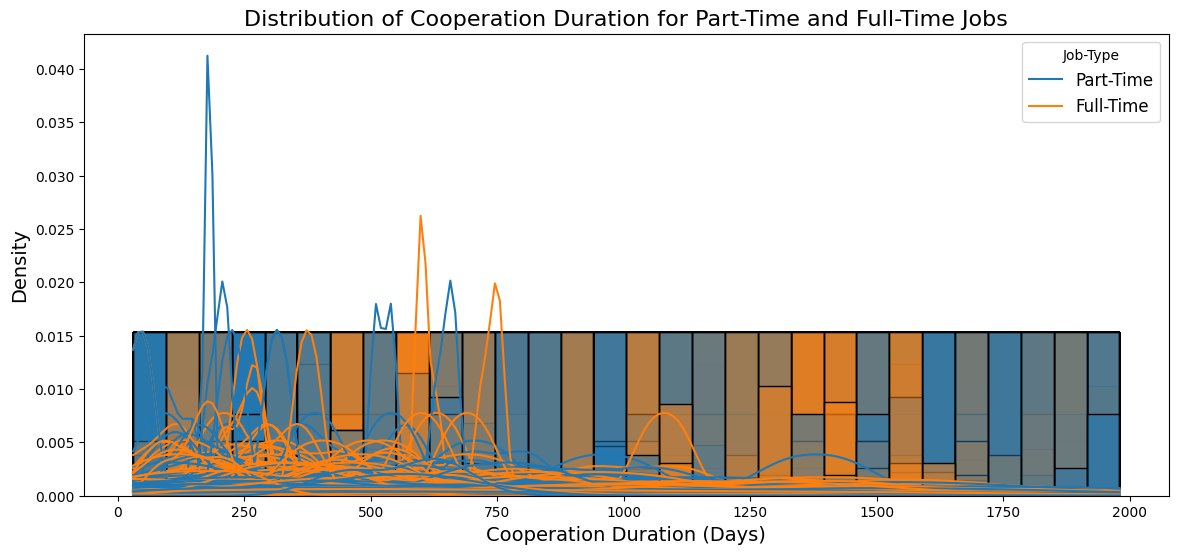

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

exp_data_cleaned_iqr['cooperation_duration_days'] = exp_data_cleaned_iqr['cooperation_duration_months'] * 30
print(exp_data_cleaned_iqr[['cooperation_duration_months', 'cooperation_duration_days']].head())

plt.figure(figsize=(14, 6))
sns.histplot(data=exp_data_cleaned_iqr, x='cooperation_duration_days', hue='time_type_full_or_part', 
             bins=30, kde=True, stat='density', common_norm=False, 
             palette=['#1f77b4', '#ff7f0e']) 

plt.title('Distribution of Cooperation Duration for Part-Time and Full-Time Jobs', fontsize=16)
plt.xlabel('Cooperation Duration (Days)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend(title='Job-Type', labels=['Part-Time', 'Full-Time'], fontsize=12)
plt.show()

# I.